Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


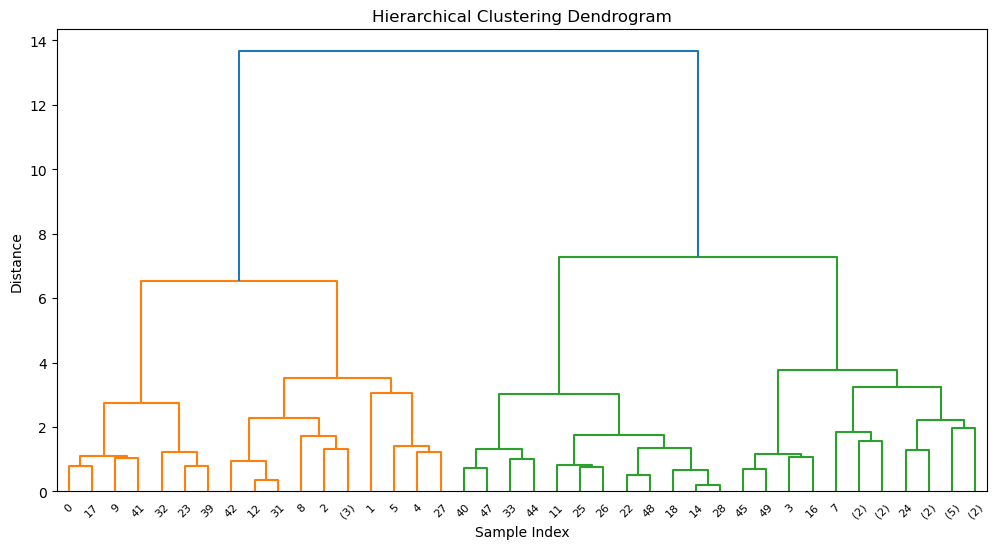

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

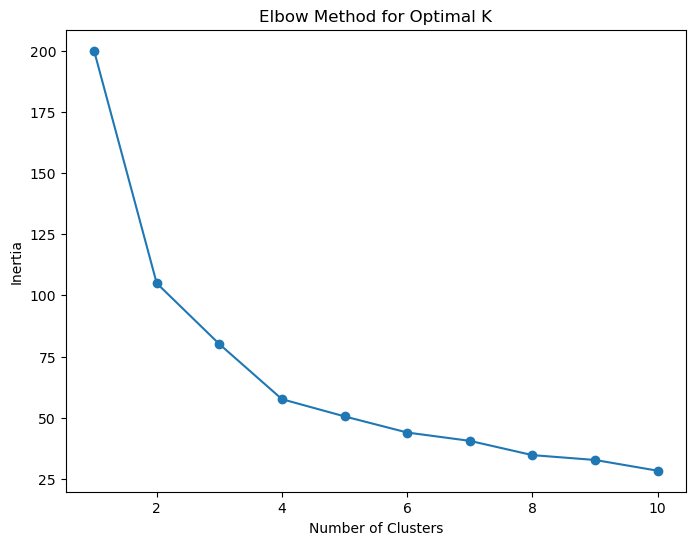

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\npooj_lqfqpr2\AppData\Local\Temp\ipykernel_4400\1202328090.py:64: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats_hierarchical = crime_data.groupby('Hierarchical_Cluster').mean()
C:\Users\npooj_lqfqpr2\AppData\Local\Temp\ipykernel_4400\1202328090

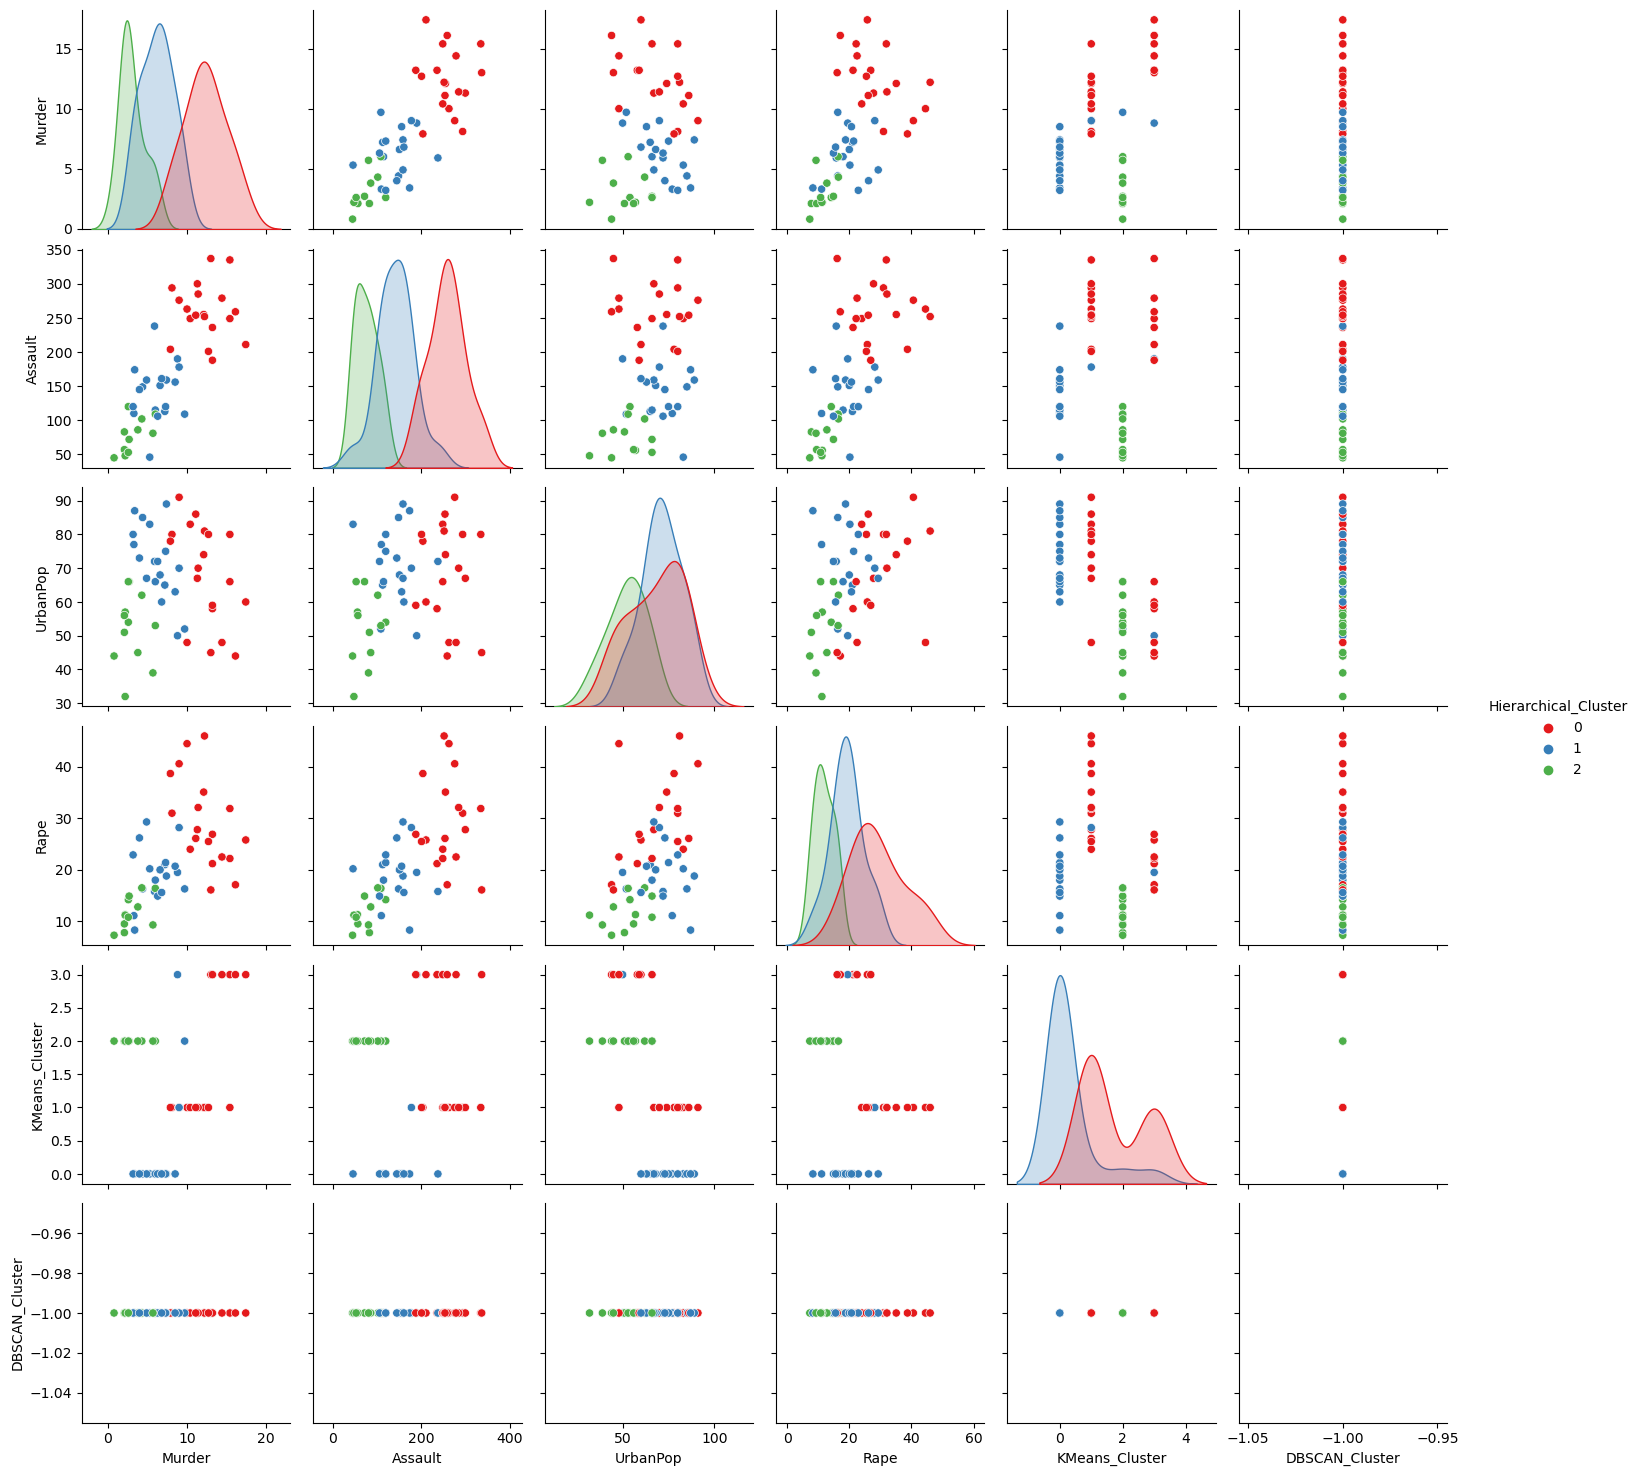

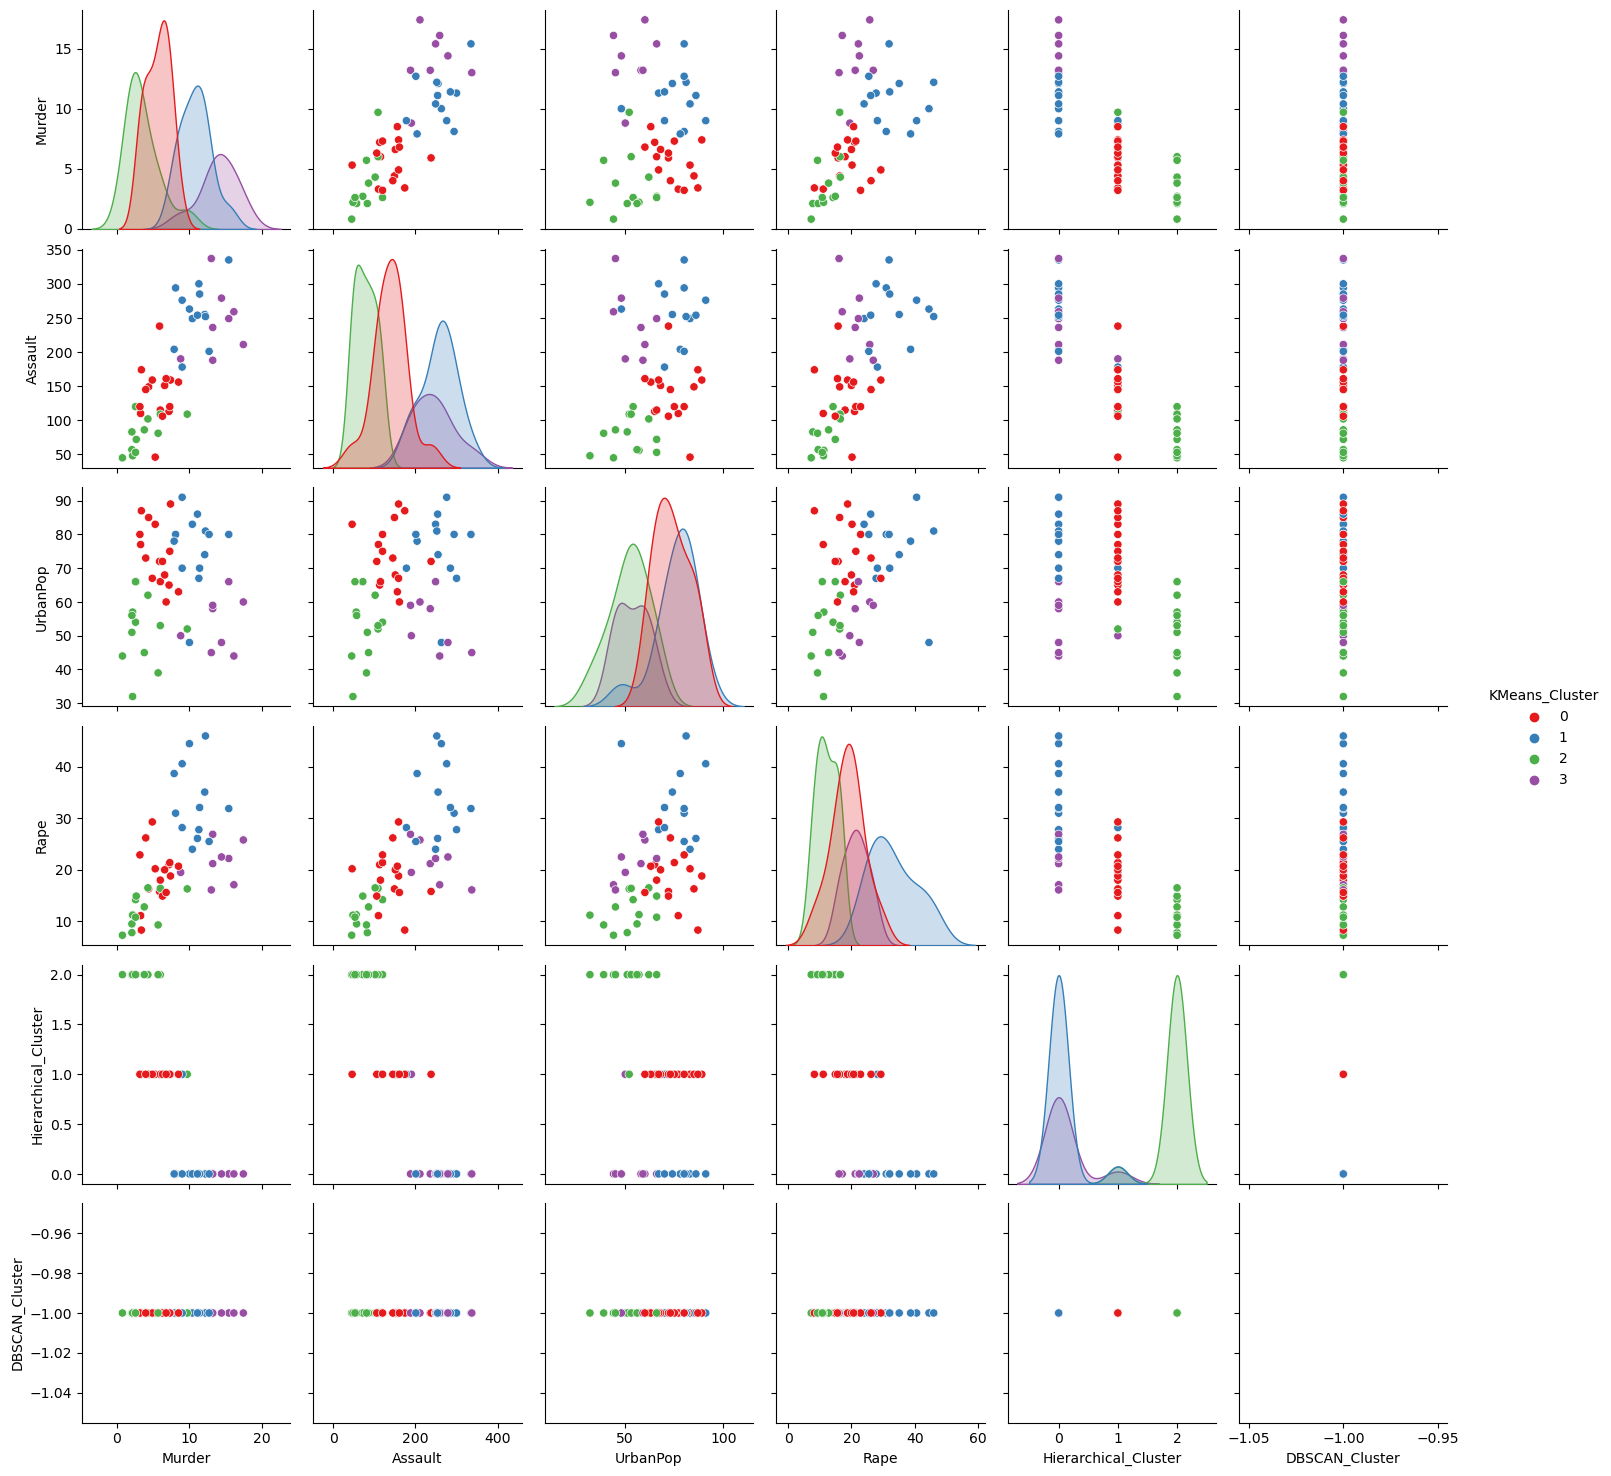

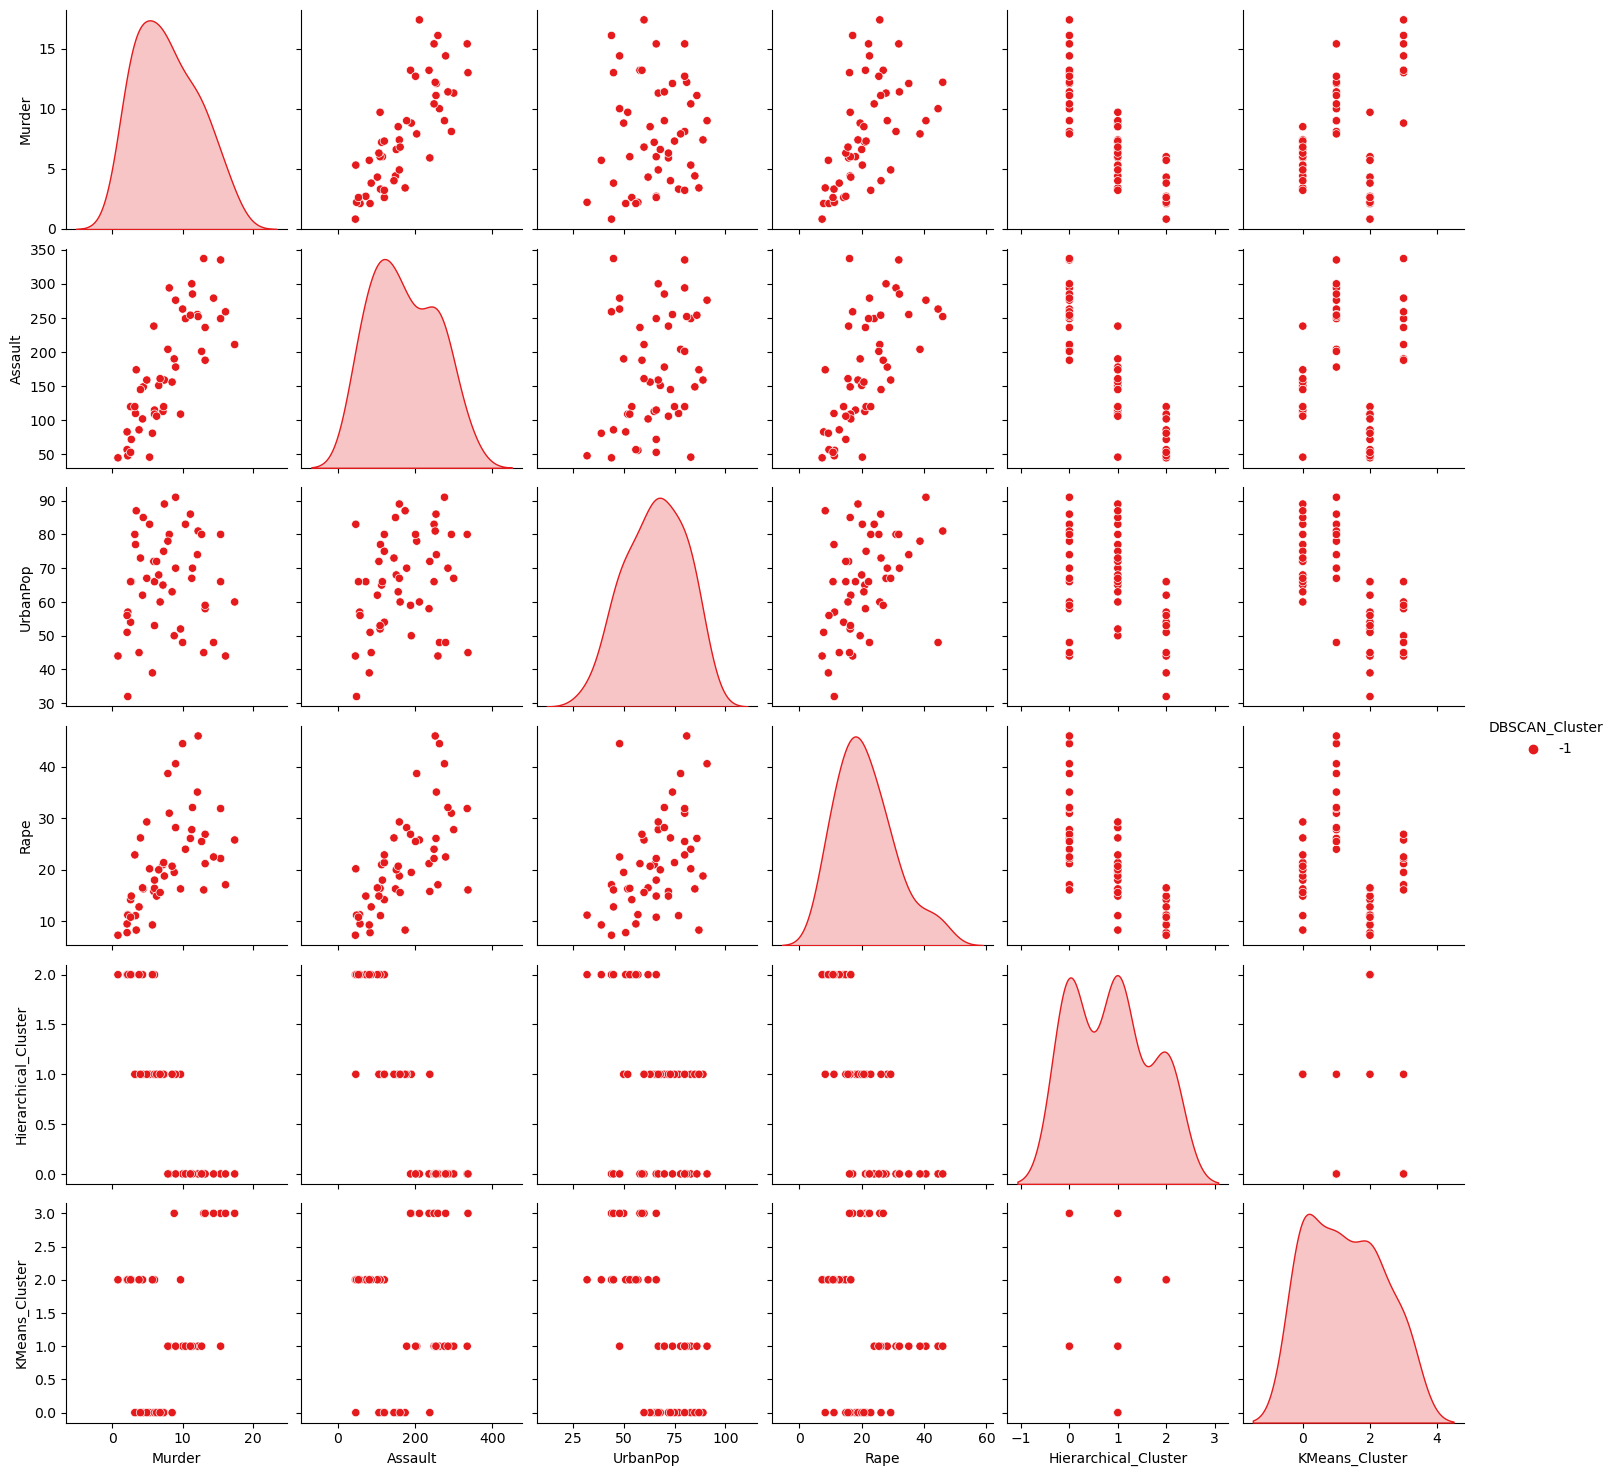

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage


crime_data = pd.read_csv("crime_data.csv")


numeric_data = crime_data.iloc[:, 1:]  


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(scaled_data)


linkage_matrix = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=5, truncate_mode='level')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Determining the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=3).fit(scaled_data)
crime_data['Hierarchical_Cluster'] = agg_clustering.labels_

# K-means Clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_data)
crime_data['KMeans_Cluster'] = kmeans.labels_

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(scaled_data)
crime_data['DBSCAN_Cluster'] = dbscan.labels_


sns.pairplot(crime_data, hue='Hierarchical_Cluster', palette='Set1', diag_kind='kde')
sns.pairplot(crime_data, hue='KMeans_Cluster', palette='Set1', diag_kind='kde')
sns.pairplot(crime_data, hue='DBSCAN_Cluster', palette='Set1', diag_kind='kde')


cluster_stats_hierarchical = crime_data.groupby('Hierarchical_Cluster').mean()
cluster_stats_kmeans = crime_data.groupby('KMeans_Cluster').mean()
cluster_stats_dbscan = crime_data.groupby('DBSCAN_Cluster').mean()


INFERENCES: 
 The data was grouped into distinct clusters using hierarchical clustering, revealing states with similar crime rate profiles and characteristics within each cluster.
K-means clustering, with an optimal number of clusters (possibly 3), categorized states based on their crime rate attributes, enabling segmentation and analysis.
 DBSCAN identified clusters based on density, allowing for the discovery of irregularly shaped clusters and classification of some states as noise when they didn't belong to any dense cluster.
 Analysis of cluster statistics provided insights into the mean values of variables within each cluster, helping understand the distinguishing features of states in those clusters.
 The results can inform law enforcement strategies, resource allocation, and policy planning by identifying high-crime and low-crime clusters, aiding decision-making processes.

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

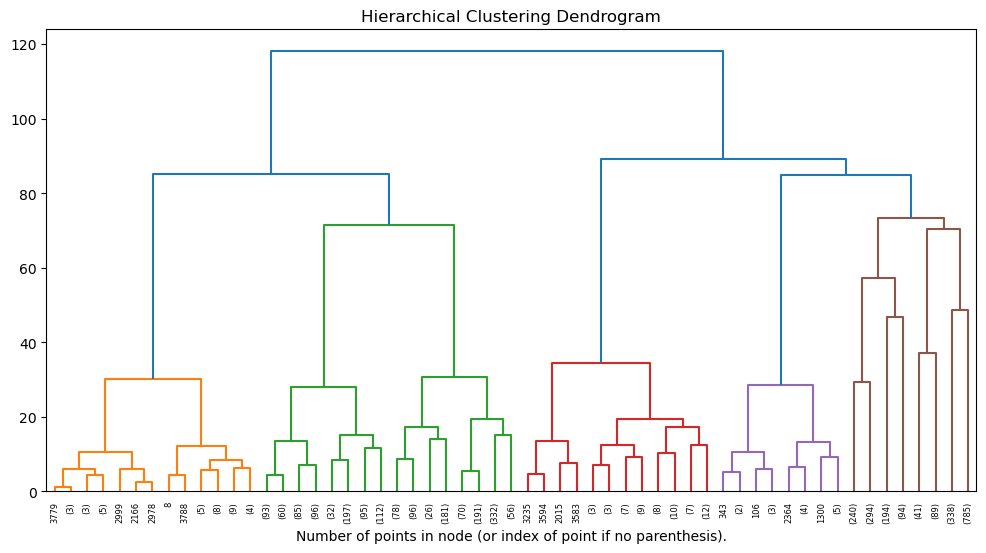

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\npooj_lqfqpr2\a

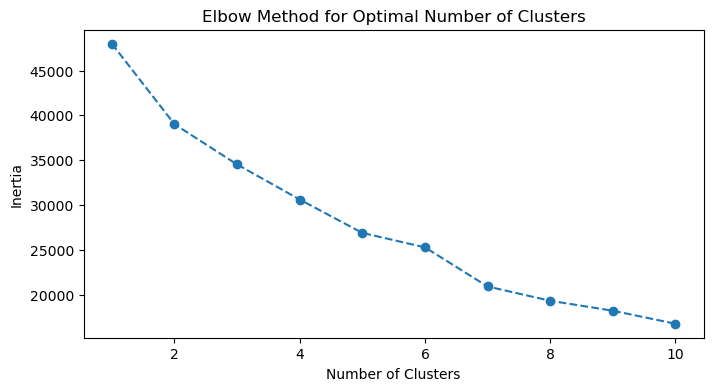

C:\Users\npooj_lqfqpr2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Means:
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               2327.116832   42243.643168   91.124356   1.245941   1.019406   
1               1445.633588  119557.722901  165.557252   3.612214   1.002290   
2               1753.128049  189304.225610  788.689024   2.182927   1.036585   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000   4896.419802     6.987723         194.355248   
1                1.037405  38921.206870    18.553435         351.196947   
2                1.000000  31780.481707    27.115854        5420.414634   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      0.598812        3549.788911  0.203564   
1               

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

# Load the dataset from the correct sheet (assuming the sheet name is 'data')
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Check if 'ID' column exists before dropping it
if 'ID' in data.columns:
    # Drop the 'ID' column as it is not needed for clustering
    data = data.drop('ID', axis=1)

# Check for non-numeric columns and exclude them from standardization
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
numeric_data = data.drop(non_numeric_cols, axis=1)

# Convert the numeric data to a NumPy array
numeric_array = numeric_data.to_numpy()

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_array)

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
agg_clustering.fit(scaled_data)

# Create a dendrogram to visualize the hierarchy
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# Determine the optimal number of clusters for K-means using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Based on the dendrogram and Elbow method, choose the optimal number of clusters for hierarchical and K-means clustering

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add clustering results to the original dataframe
data['Hierarchical_Cluster'] = agg_clustering.labels_
data['KMeans_Cluster'] = kmeans_clusters
data['DBSCAN_Cluster'] = dbscan_clusters

# Analyze the clusters
cluster_means = data.groupby('KMeans_Cluster').mean()
cluster_counts = data['KMeans_Cluster'].value_counts()

# Display cluster means and counts
print("Cluster Means:")
print(cluster_means)
print("\nCluster Counts:")
print(cluster_counts)


In [ ]:
INFERENCES:
K-means clustering revealed three distinct passenger segments based on their flying behavior and characteristics.

Airlines can target each cluster with customized marketing strategies and rewards to meet their unique preferences and needs.

Strategies can be developed to retain high-value passengers in Cluster 2 and engage infrequent flyers in Cluster 0.

Data analysis empowers airlines to optimize operations and enhance customer satisfaction, leading to increased revenue.

By understanding and catering to different customer segments, airlines can improve the overall passenger experience.